# Imports

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

%matplotlib widget
plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
# plt.rcParams['figure.figsize'] = [10.0, 6.0]
# plt.rcParams['font.size'] = 16
plt.style.use('classic')

# Load data

In [5]:
path = '/Users/max/SLAC Fall 2024/LXeSims/Geant4_test'
# path = '/Users/max/SLAC Fall 2024/LXeSims/radius_test'

n_events = 1e3

df = pd.read_csv(path+'/rDet.txt', skiprows=3, names='x y z Px Py Pz t PDGid EventID TrackID ParentID Weight'.split(' '), delim_whitespace=True).drop(index=0)

# Check beam $\sigma_r$ upon entrance

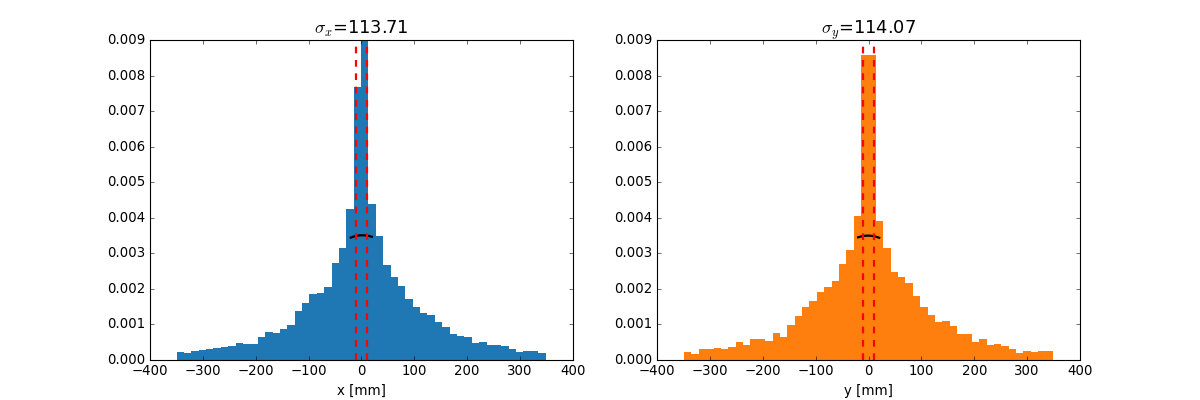

In [6]:
from scipy.stats import norm

# r = np.sqrt(df['x']**2 + df['y']**2)

fitX = np.linspace(-20, 20, 100)
# fitR = np.linspace(-10, 20, 100)

muX, stdX = norm.fit(df['x'])
muY, stdY = norm.fit(df['y'])
# muX, stdX = norm.fit(df['x'][abs(df['x'])<=10])
# muY, stdY = norm.fit(df['y'][abs(df['y'])<=10])

# muR, stdR = norm.fit(r)

pX = norm.pdf(fitX, muX, stdX)
pY = norm.pdf(fitX, muY, stdY)

# pR = norm.pdf(fitR, muR, stdR)

plt.close()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plt.hist(r, facecolor = 'tab:blue', linewidth = 0)
h = ax[0].hist(df['x'], facecolor = 'tab:blue', bins = 50, linewidth = 0, density=True)
ax[0].plot(fitX, pX, 'k', linewidth=2)
ax[0].set_xlabel('x [mm]')
ax[0].set_title(r'$\sigma_x$=' + f'{stdX:.2f}', fontsize=16)

h = ax[1].hist(df['y'], facecolor = 'tab:orange', bins = 50, linewidth = 0, density=True)
ax[1].plot(fitX, pY, 'k', linewidth=2)
ax[1].set_xlabel('y [mm]')
ax[1].set_title(r'$\sigma_y$=' + f'{stdY:.2f}', fontsize=16)

for i in range(2):
    ax[i].axvline(x=-10, c='r', ls='--', linewidth=2)
    ax[i].axvline(x=10, c='r', ls='--', linewidth=2)

plt.show()


# plt.close()
# plt.figure()
# plt.hist(r, facecolor = 'tab:red', bins = 30, linewidth = 0, density=True)
# plt.plot(fitR, pR, 'k', linewidth=2)
# plt.xlabel('r [mm]')
# plt.show()

In [28]:
print(f"{len(df['x'][abs(df['x'])<=10].index)/len(df['x'].index)*100:.2f} %")

99.89 %
